# Community alignment of training questions

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
from ollama_models import ollama_models
models = ollama_models()

In [3]:
from community_alignment import community_alignment

Loaded existing index from forecast_index.faiss
Index contains 4894 vectors at initialization


100%|████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 9220.28it/s]

saved community_cogito:latest.json


,model,id,title,error
4,cogito:latest,1454,What will be the total aggregate score given t...,0.142093
1,cogito:latest,8734,What percentage of new vehicle production will...,0.396277
3,cogito:latest,1482,What percentage of Americans will be obese or ...,0.425512
9,cogito:latest,2622,What will be the highest level of annual GDP g...,0.594289
6,cogito:latest,6614,What is the highest value 1 bitcoin will ever ...,0.637316
5,cogito:latest,3054,How many hours will the average American emplo...,0.653501
7,cogito:latest,1337,Drake's Equation 1st Parameter R∗: What is the...,0.723583
8,cogito:latest,5531,How many seats will be on the Supreme Court of...,0.738811
0,cogito:latest,7811,How many nuclear weapons will be detonated off...,0.800000
2,cogito:latest,6633,In how many years will humanity's descendants ...,1.000000


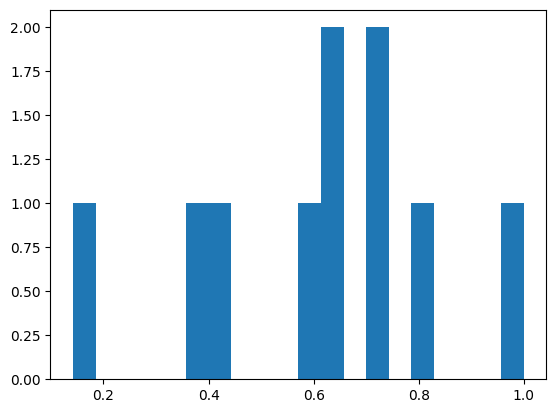

In [4]:
dfs = {}
for model in models:
    df = community_alignment(model)
    dfs[model] = df
    df1 = df[['model', 'id', 'title', 'error']].sort_values(by='error')
    display(df1)
    break

In [6]:
df[df.id == 7811].iloc[0]

id                                                                           7811
open_time                                                    2021-08-23T13:00:00Z
scheduled_resolve_time                                       2055-01-02T00:13:00Z
title                           How many nuclear weapons will be detonated off...
question_description            Currently, nine countries possess nuclear weap...
question_resolution_criteria    This question will resolve as the number of nu...
question_fine_print             >Test detonations and peaceful nuclear explosi...
question_type                                                             numeric
question_options                                                             None
question_group_variable                                                          
question_question_weight                                                      1.0
question_unit                                                             weapons
question_open_up